# **Panel Tracking**
orients the panels towards the sun as much as possible in order to maximize the cross section presented towards incoming beam irradiance.


From docs (https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.tracking.singleaxis.html#pvlib.tracking.singleaxis):

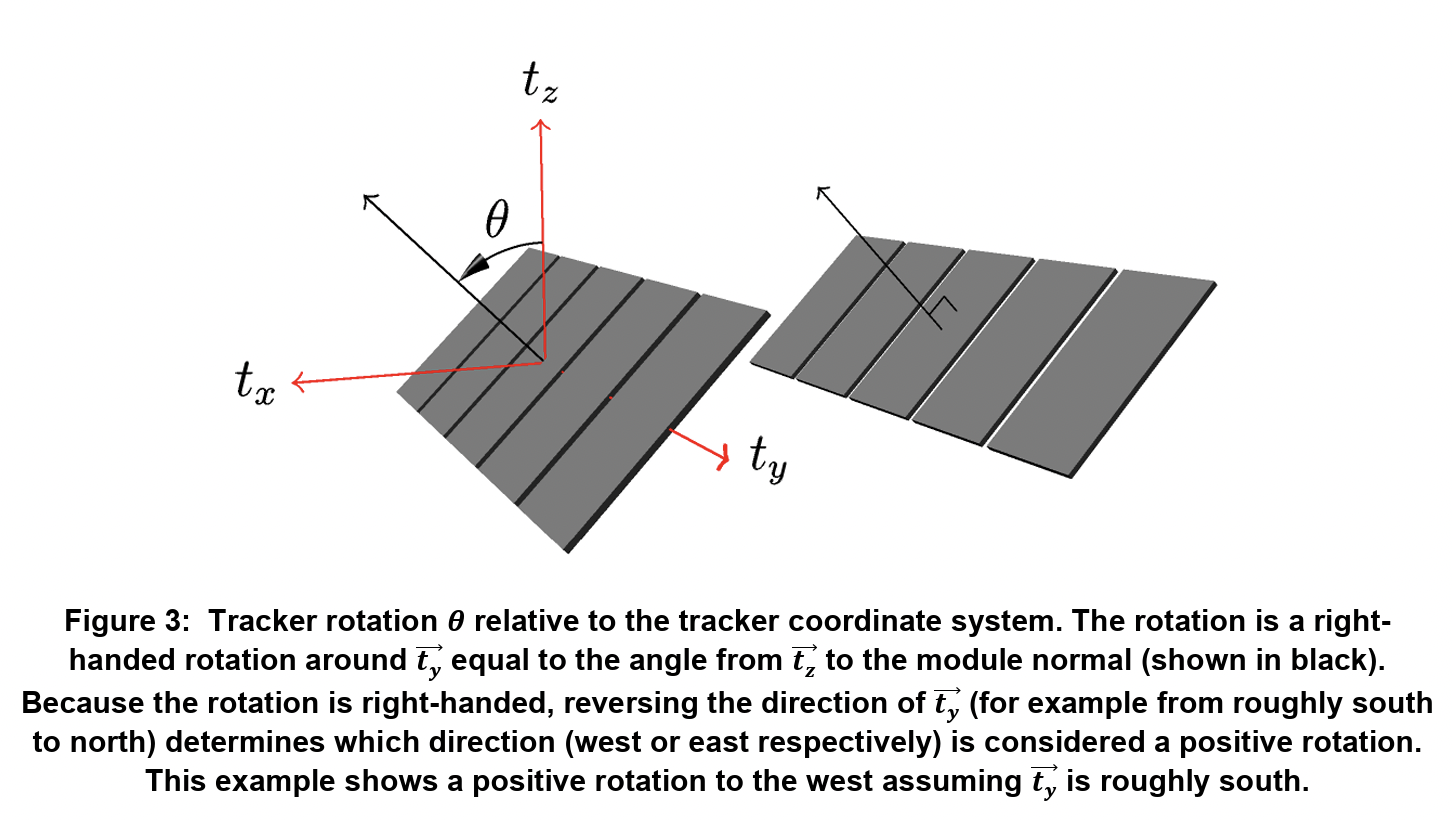

In [21]:
from IPython import display
display.Image("ressources/tracker_COS.png")

Rotation angle is determined in a right-handed coordinate system. The tracker axis_azimuth defines the positive y-axis, the positive x-axis is 90 degrees clockwise from the y-axis and parallel to the Earth’s surface, and the positive z-axis is oriented skyward. Rotation angle tracker_theta is a right-handed rotation around the y-axis in the x, y, z coordinate system and indicates tracker position relative to horizontal. For example, if tracker axis_azimuth is 180 (oriented south) and axis_tilt is zero, then a tracker_theta of zero is horizontal, a tracker_theta of 30 degrees is a rotation of 30 degrees towards the west, and a tracker_theta of -90 degrees is a rotation to the vertical plane facing east.

Tracker rotates around the y-axis, relative to panel direction 130° azimuth, actuator changes elevation angle
--> rotation axis azimuth = 40°

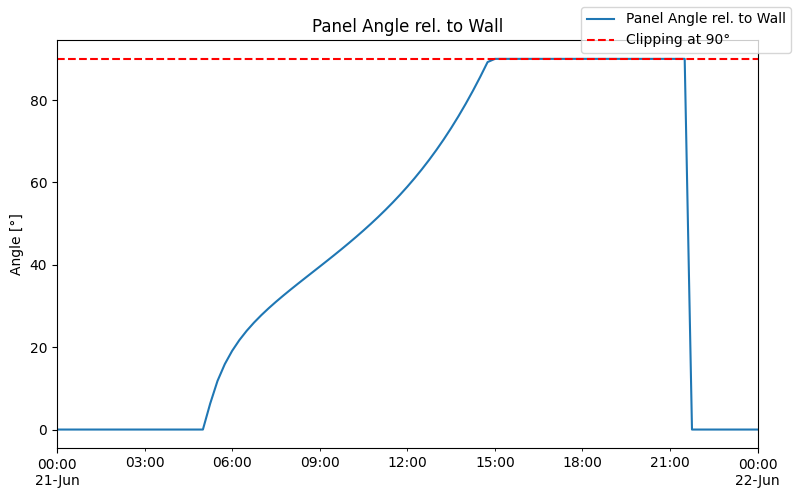

In [22]:
from pvlib import solarposition, tracking
import pandas as pd
import matplotlib.pyplot as plt

# Standortparameter
lat, lon = 51.401944, 10.737222
tz = 'Europe/Berlin'
panel_azimuth = 130
rotation_axis_azimuth = panel_azimuth - 90

times = pd.date_range('2025-06-21', '2025-06-22', freq='15min',
                      tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)

truetracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=rotation_axis_azimuth,
    max_angle=90,
    backtrack=False,  # for true-tracking
    gcr=0.5)  # irrelevant for true-tracking

# fill NaN values with 0
truetracking_position = truetracking_angles['tracker_theta'].fillna(90)

# convert optimal tracker theta to alpha (elevation angle relativ to horizontal)
truetracking_position = -truetracking_position + 90

# clip at 90 degrees
clipping_val = 90
truetracking_position = truetracking_position.clip(upper=clipping_val)

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 5))
truetracking_position.plot(title='Panel Angle rel. to Wall', ax=ax)
ax.hlines(y=clipping_val, xmin=truetracking_position.index.min(), xmax=truetracking_position.index.max(), color='r', linestyle='--')
ax.set_ylabel('Angle [°]')

fig.legend(['Panel Angle rel. to Wall', 'Clipping at 90°'])
fig.tight_layout()
plt.show()

In [24]:
import pandas as pd
from pvlib import solarposition, tracking

# Standortparameter
lat, lon = 51.401944, 10.737222
tz = 'Europe/Berlin'
panel_azimuth = 130
rotation_axis_azimuth = panel_azimuth - 90

# Zeitpunkte im Stundenraster für das ganze Jahr 2025
times = pd.date_range('2025-01-01 00:00', '2025-12-31 23:00', freq='1h', tz=tz)

# 🔢 Sonnenstand berechnen
solpos = solarposition.get_solarposition(times, lat, lon)

# Trackingwinkel berechnen (Süd-Ausrichtung, keine Rücknachführung)
tracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=rotation_axis_azimuth,
    max_angle=90,
    backtrack=False,
    gcr=0.5
)

# 🧼 Tabelle aufbereiten
df = pd.DataFrame({
    'datetime': times,
    'azimuth': solpos['azimuth'],
    'elevation': solpos['apparent_elevation'],
    'tracker_theta': tracking_angles['tracker_theta'].fillna(0)  # falls Sonne unter Horizont
})

# 💾 Als CSV speichern
df.to_csv('tracker_schedule_2025.csv', index=False)

print("Fertig: Datei 'tracker_schedule_2025.csv' erzeugt.")


Fertig: Datei 'tracker_schedule_2025.csv' erzeugt.
